<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B8%20%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B0%D1%80%D0%BE%D0%BA%20%D0%B0%D0%B2%D1%82%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification

In [ ]:
!pip install keras==2.0 -q 
!pip install tensorflow==2.7.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.4/498.4 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.5 MB/s

## Импортируем необходимые библиотеки

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os 
from google.colab import drive
import gdown
import tensorflow as tf
import PIL
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline

## Download and explore the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib

data_dir = '/content/drive/MyDrive/Numpy/car_classification'
data_dir = pathlib.Path(data_dir)

After downloading, you should now have a copy of the dataset available. There are 1050 total images:

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1050


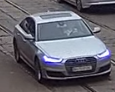

In [ ]:
roses = list(data_dir.glob('AUDI/*'))
PIL.Image.open(str(roses[0]))

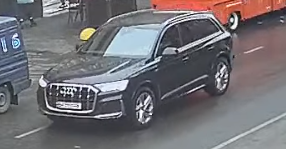

In [ ]:
PIL.Image.open(str(roses[10]))

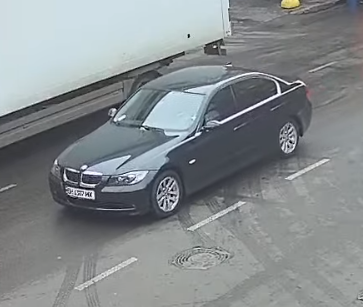

In [ ]:
tulips = list(data_dir.glob('BMW/*'))
PIL.Image.open(str(tulips[20]))

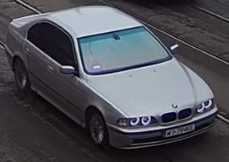

In [ ]:
PIL.Image.open(str(tulips[11]))

Define some parameters for the loader:

In [ ]:
batch_size = 75
img_height = 50
img_width = 100

При разработке модели рекомендуется использовать разделение проверки. Давайте используем 75% изображений для обучения и 25% для проверки.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="training",
  seed=125,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1050 files belonging to 36 classes.
Using 788 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="validation",
  seed=125,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1050 files belonging to 36 classes.
Using 262 files for validation.


Вы можете найти имена классов в атрибуте class_names в этих наборах данных.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['AUDI', 'BMW', 'Chery', 'Chevrolet', 'Chryslerр', 'Citroën', 'Daewoo', 'Dodge', 'Ford', 'HONDA', 'HYUNDAI', 'Infiniti', 'JEEP', 'Jaguar', 'KIA', 'LADA', 'Land Rover Range Rover', 'Lexus', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Opel', 'Porsche', 'Renault', 'SUBARU', 'Skoda', 'Ssang Yong', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'АЗЛК', 'АКУРА', 'ГАЗ', 'ЗАЗ   ZAZ']


## Visualize the data

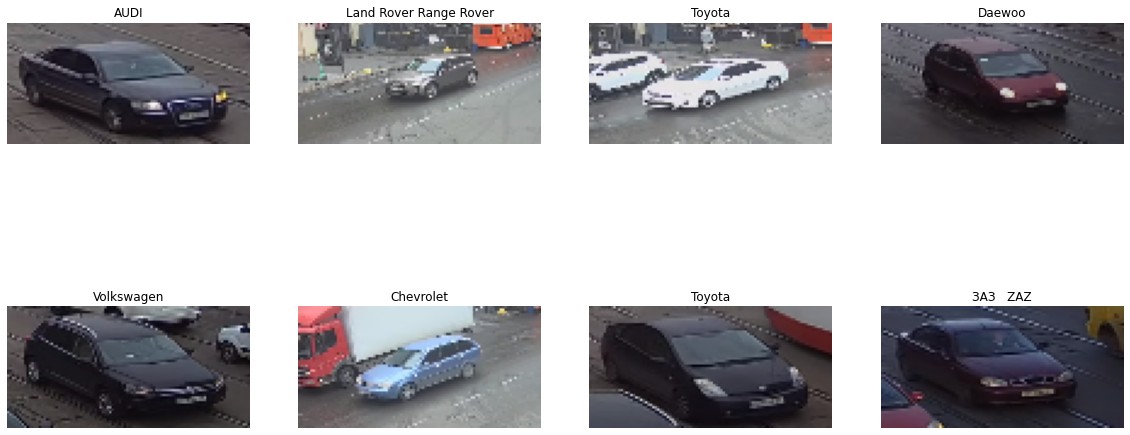

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(75, 50, 100, 3)
(75,)


## Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(2000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


## A basic Keras model

### Create the model

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 50, 100, 3)        0         
                                                                 
 conv2d (Conv2D)             (None, 50, 100, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 25, 128)       7

### Train the model

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
11/11 [==============================] - 65s 6s/step - loss: 3.2947 - accuracy: 0.0812 - val_loss: 3.1494 - val_accuracy: 0.0992
Epoch 2/100
11/11 [==============================] - 0s 22ms/step - loss: 3.1383 - accuracy: 0.1117 - val_loss: 3.1405 - val_accuracy: 0.1527
Epoch 3/100
11/11 [==============================] - 0s 17ms/step - loss: 3.0916 - accuracy: 0.1206 - val_loss: 3.1759 - val_accuracy: 0.0992
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 3.0387 - accuracy: 0.1307 - val_loss: 3.1106 - val_accuracy: 0.1565
Epoch 5/100
11/11 [==============================] - 0s 17ms/step - loss: 2.9925 - accuracy: 0.1193 - val_loss: 3.0757 - val_accuracy: 0.1489
Epoch 6/100
11/11 [==============================] - 0s 17ms/step - loss: 2.8692 - accuracy: 0.1815 - val_loss: 3.0858 - val_accuracy: 0.1450
Epoch 7/100
11/11 [==============================] - 0s 16ms/step - loss: 2.7728 - accuracy: 0.2132 - val_loss: 3.0672 - val_accuracy: 0.1450
Epoch 8

## Visualize training results

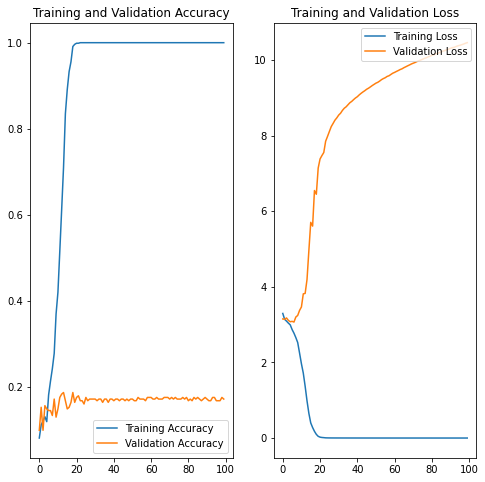

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

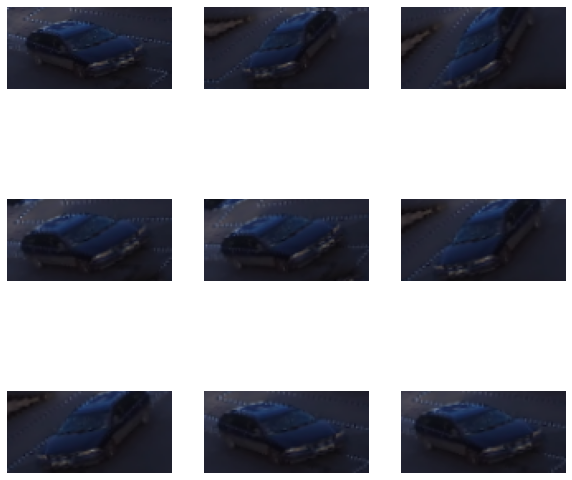

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Dropout

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 50, 100, 3)        0         
                                                                 
 rescaling_2 (Rescaling)     (None, 50, 100, 3)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 100, 32)       896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 50, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 25, 64)       0         
 2D)                                                  

In [ ]:
epochs = 56
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/56
11/11 [==============================] - 0s 40ms/step - loss: 2.0861 - accuracy: 0.3541 - val_loss: 4.3071 - val_accuracy: 0.1374
Epoch 2/56
11/11 [==============================] - 0s 29ms/step - loss: 1.9737 - accuracy: 0.4048 - val_loss: 4.3772 - val_accuracy: 0.1336
Epoch 3/56
11/11 [==============================] - 0s 20ms/step - loss: 1.9713 - accuracy: 0.3921 - val_loss: 4.3329 - val_accuracy: 0.1221
Epoch 4/56
11/11 [==============================] - 0s 18ms/step - loss: 1.8270 - accuracy: 0.4442 - val_loss: 4.4069 - val_accuracy: 0.1565
Epoch 5/56
11/11 [==============================] - 0s 19ms/step - loss: 1.8565 - accuracy: 0.4670 - val_loss: 4.4890 - val_accuracy: 0.1412
Epoch 6/56
11/11 [==============================] - 0s 18ms/step - loss: 1.8190 - accuracy: 0.4505 - val_loss: 4.5544 - val_accuracy: 0.1336
Epoch 7/56
11/11 [==============================] - 0s 19ms/step - loss: 1.7781 - accuracy: 0.4543 - val_loss: 4.3958 - val_accuracy: 0.1374
Epoch 8/56
11

## Visualize training results

After applying data augmentation and `tf.keras.layers.Dropout`, there is less overfitting than before, and training and validation accuracy are closer aligned:

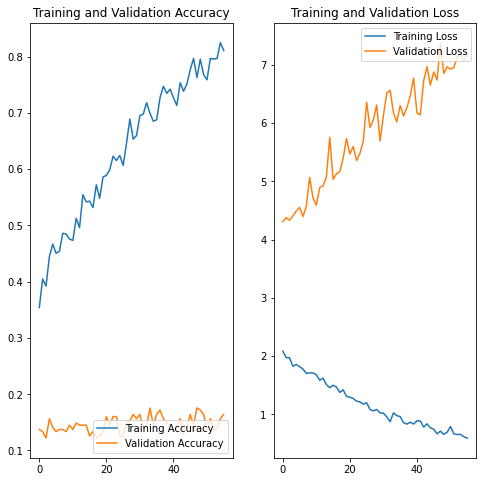

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

In [ ]:
sunflower_url = "https://wroom.ru/i2/carpic/38700.jpg"
sunflower_path = tf.keras.utils.get_file('Ford', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

573440/564856 [==============================] - 0s 0us/step
This image most likely belongs to Mitsubishi with a 98.95 percent confidence.
